# EDA for the vertebral column dataset

In [2]:
# Load the libraries we'll use
######################################

# Basic numerics
import numpy as np
import scipy as sp
import scipy.stats as st

# Suppress certain irrelevant warnings in the graphics libraries
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Graphics
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})

# Statistical tools
from statsmodels.distributions.empirical_distribution import ECDF
import statsmodels.api as sm

Before doing anything else, we make sure there's a directory to receive the figures we'll plot.

In [4]:
# See https://www.tutorialspoint.com/How-can-I-create-a-directory-if-it-does-not-exist-using-Python
import os
if not os.path.exists('Figures'):
    os.makedirs('Figures')

## Read the data

The data, which are described in detail in the file `vertebral_column_metadata.txt`, consist of lines that look like those below, with six numerical enries, separated by spaces, and a final, seventh entry that is either `AB` for abnormal subjects or `NO` for normal ones.

```
63.03 22.55 39.61 40.48 98.67 -0.25 AB
39.06 10.06 25.02 29 114.41 4.56 AB
68.83 22.22 50.09 46.61 105.99 -3.53 AB
69.3 24.65 44.31 44.64 101.87 11.21 AB
49.71 9.65 28.32 40.06 108.17 7.92 AB
```

In [7]:
# Read the data and extract the sixth column
f = open('vertebral_column_data.txt', 'r')
x = np.loadtxt(f, unpack=False, usecols = (5))

# Look at the first few entries
x[0:5]

array([-0.25,  4.56, -3.53, 11.21,  7.92])

#### Get the min, max and number of entries in the data.

In [9]:
np.min(x)

-11.06

In [10]:
np.max(x)

418.54

In [11]:
len(x)

310

## Density estimates

Here we use `kdeplot` and `histplot` to draw a histogram and a KDE (based on a Gaussian kernel) on the same axes.

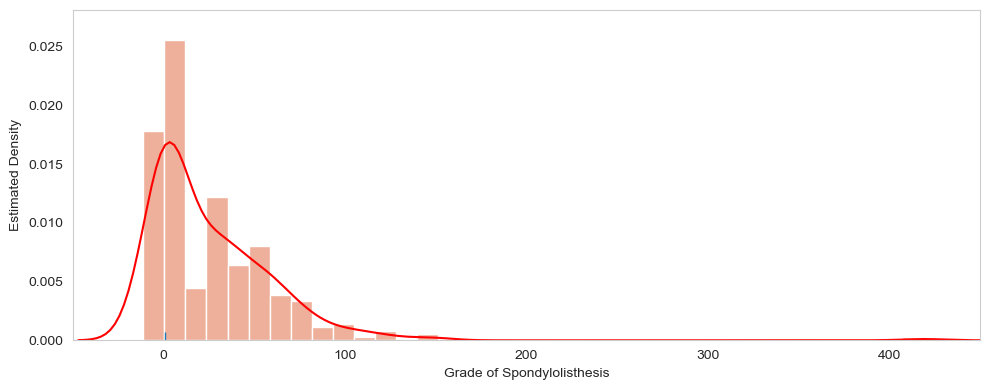

In [14]:
# Set the figure's size
plt.figure(figsize=(10,4))

# Draw a histogram and a KDE with Seaborn 
ax = sns.kdeplot( x, color="red", label="Kernel Density")
sns.histplot( x, stat="density", color = "darksalmon", label="Histogram"  )

# Finally, add a rug plot
sns.rugplot( np.array([1]), label="Rug Plot" )

# Add axis labels 
plt.xlabel('Grade of Spondylolisthesis')
plt.ylabel('Estimated Density')

# Set the limits on the axes
plt.xlim([-50,450])
plt.tight_layout()

# Save to a file and display
plt.savefig('Figures/spine_distplot.pdf')
plt.show()

#### Log-transformed data

Transforming the data by taking its log expands the scale for smaller values, which can sometmes be illuminating.

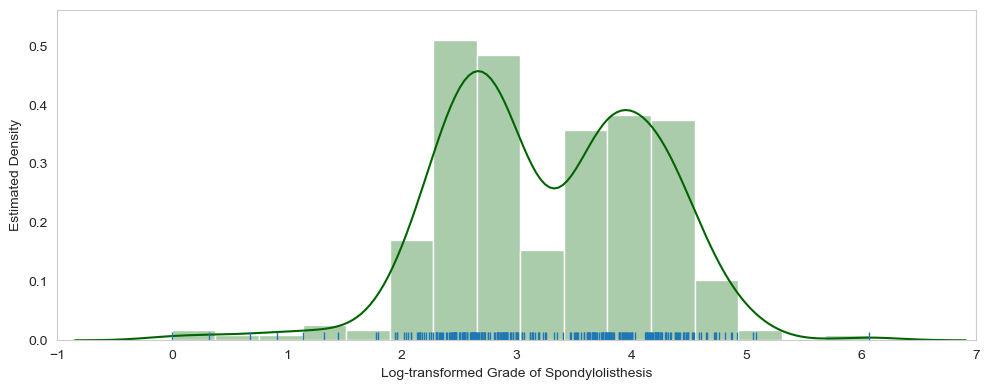

In [17]:
# Set the figure's size
plt.figure(figsize=(10,4))

# Plot the histogram and KDE
y = np.log(x-np.min(x)+1.0) # Log-transform the data to expand the scale for lower values

# Draw a histogram and a KDE
ax = sns.kdeplot( y, color="darkgreen", label="Kernel Density")
sns.histplot( y, stat="density", color = "darkseagreen", label="Histogram"  )

# Add a rug plot
sns.rugplot( y, label="Rug Plot")

# Add axis labels 
plt.xlabel('Log-transformed Grade of Spondylolisthesis')
plt.ylabel('Estimated Density')

# Set the limits on the axes
plt.xlim([-1,7])
plt.tight_layout()

# Save to a file and display
plt.savefig('Figures/spine_log.pdf')
plt.show()

### Changing the kernel function

Here we compute density estimates using three standard kernels: the uniform, triangular and Gaussian kernels.

In [20]:
# The uniform kernel
mykde = sm.nonparametric.KDEUnivariate(x)
mykde.fit(kernel="uni", fft=False)
xuni = mykde.support
yuni = mykde.density

# The triangular kernel
mykde2 = sm.nonparametric.KDEUnivariate(x)
mykde2.fit(kernel="tri", fft=False)
xtri = mykde2.support
ytri = mykde2.density

# The Gaussian kernel
mykde3 = sm.nonparametric.KDEUnivariate(x)
mykde3.fit(kernel="gau")
xgau = mykde3.support
ygau = mykde3.density

#### Comparing KDEs based on the Gaussian and uniform kernels

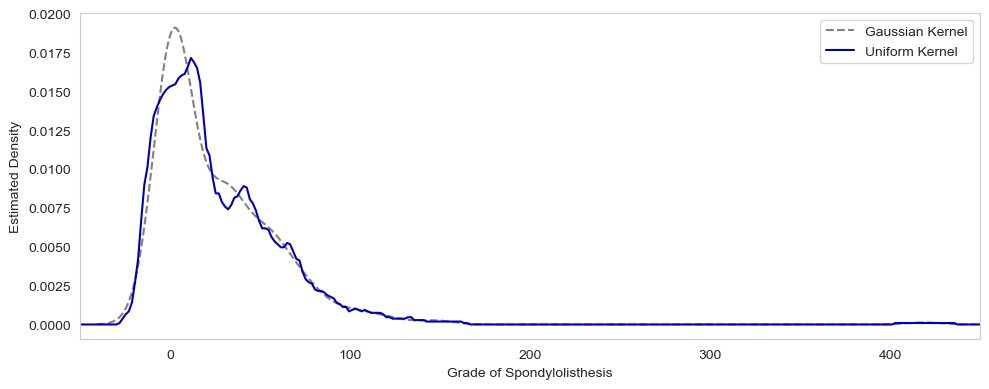

In [22]:
# Set the figure's size
plt.figure(figsize=(10,4))

# Plot the two KDEs
plt.plot(xgau,ygau,label='Gaussian Kernel',color=[0.5,0.5,0.5],linestyle='--')
plt.plot(xuni,yuni,label='Uniform Kernel',color=[0,0,0.7],linestyle='-')

# Add labels and a legend
plt.xlabel('Grade of Spondylolisthesis')
plt.ylabel('Estimated Density')
plt.xlim([-50,450])
plt.legend()
plt.tight_layout()

# Save to a file and display
plt.savefig('Figures/spine_uni.pdf')
plt.show()

#### Comparing KDEs based on the Gaussian and triangular kernels

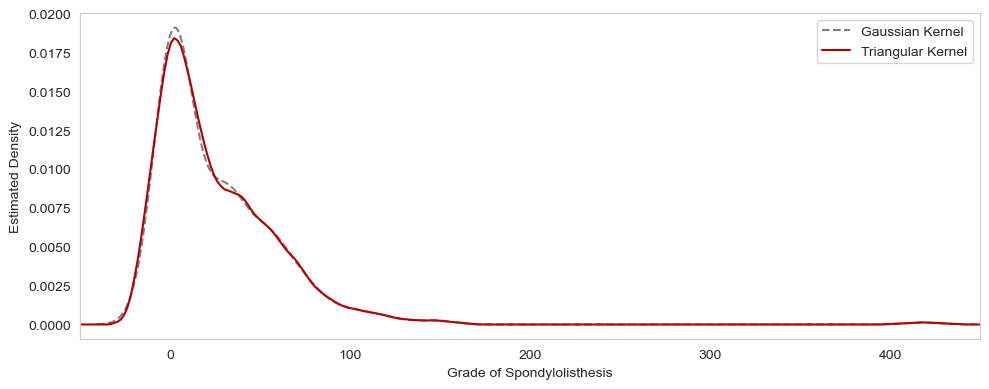

In [24]:
# Set the figure's size
plt.figure(figsize=(10,4))

# Plot the two KDEs
plt.plot(xgau,ygau,label='Gaussian Kernel',color=[0.5,0.5,0.5],linestyle='--')
plt.plot(xtri,ytri,label='Triangular Kernel',color=[0.7, 0, 0],linestyle='-')

# Add labels and a legend
plt.xlabel('Earthquake Severity')
plt.ylabel('Estimated Density')
plt.xlabel('Grade of Spondylolisthesis')
plt.ylabel('Estimated Density')
plt.xlim([-50,450])
plt.legend()
plt.tight_layout()

# Save to a file and display
plt.savefig('Figures/spine_tri.pdf')
plt.show()